# Homework 6  - Logistic Regression without using any libraries. 

## Your Name Here

Student Name: Ethan Mikel

Student UT EID: etm693

---

Partner Name: David Paul Salinas

Partner UT EID: dps2387

---

Date Created:

Date Last Modified:

---

Totoal Points 20. 



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task 1 - (4 points)
We want to use logistic regerssion to predict if a patient will have heart problems or not. The column "Target" in our datasets includes data about heart disease. If the patient had heart disease, the patient's "Target" value equals 1. Otherwise, "Target" equals 0.

Prepare your data set for predicting heart disease ("Target" column) by using 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 

Split your data into 80% traning data and 20% test data ***without*** using any libraries other than the ones imported above. You must do it manually.

* Do a maximum of **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower. 
* **Visualize your error/costs over the iterations with a plot**.
* No need to add an y-intercept in this task. 

(**4 points** - 3 points for code, 1 point for cost visualization)

/var/folders/r0/2bznd4yn22z1s1_xg2swr2hw0000gn/T/ipykernel_30706/208866149.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (-1/242) * np.sum(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))
/var/folders/r0/2bznd4yn22z1s1_xg2swr2hw0000gn/T/ipykernel_30706/208866149.py:10: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/242) * np.sum(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))


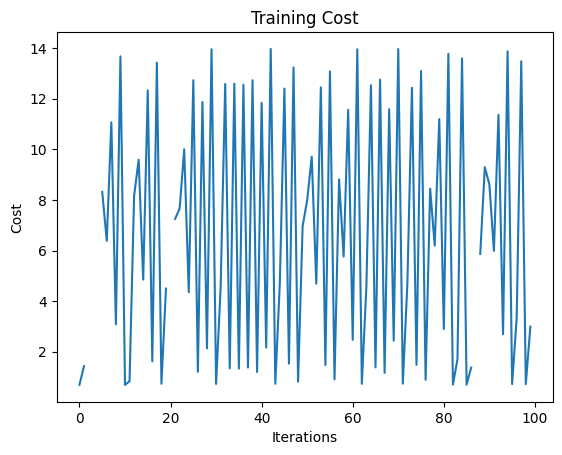

In [3]:
heart_df['Target'] = heart_df['Target'].map({'Yes': 1, 'No': 0})
X, y = heart_df[['Age', 'Sex', 'Chol']].values, heart_df['Target'].values
X_train, X_test, y_train, y_test = X[:242], X[242:], y[:242], y[242:]

weights, lr, iters, costs = np.zeros(3), 0.001, 100, []
sigmoid = lambda z: 1 / (1 + np.exp(-z))

for _ in range(iters):
    preds = sigmoid(X_train @ weights)
    cost = (-1/242) * np.sum(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))
    costs.append(cost)
    weights -= lr * (X_train.T @ (preds - y_train)) / 242

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Cost')
plt.show()

# Task 2 - (4 points)

Cacluate the Accuracy, Precision, Recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. 

You may use equations shown in lecture/slides/examples.

Calcuate the accuracy, precision, recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. (**4 points**)


In [4]:
y_pred = sigmoid(X_test @ weights) >= 0.5

TP = np.sum((y_pred == 1) & (y_test == 1))
FP = np.sum((y_pred == 1) & (y_test == 0))
TN = np.sum((y_pred == 0) & (y_test == 0))
FN = np.sum((y_pred == 0) & (y_test == 1))

accuracy = (TP + TN) / len(y_test)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.5246
Precision: 0.5246
Recall: 1.0000
F1 Score: 0.6882


# Task 3 - (4 points)

Add a y-intercept and repeat the above tasks. Do you see any differences after adding the y-intercept?

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

/var/folders/r0/2bznd4yn22z1s1_xg2swr2hw0000gn/T/ipykernel_30706/797670788.py:10: RuntimeWarning: divide by zero encountered in log
  cost = (-1/242) * np.sum(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))
/var/folders/r0/2bznd4yn22z1s1_xg2swr2hw0000gn/T/ipykernel_30706/797670788.py:10: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/242) * np.sum(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))


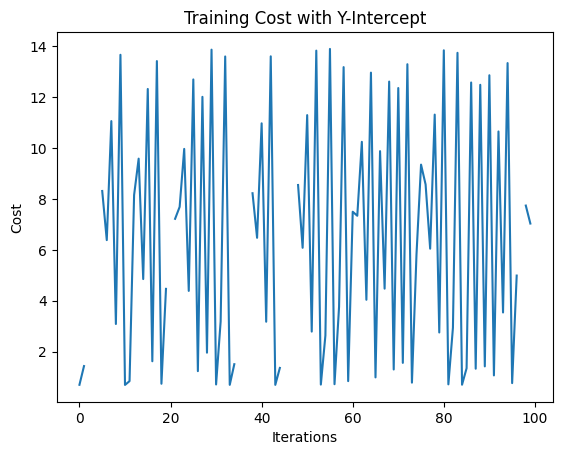

Accuracy: 0.4754
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


In [5]:
X = np.hstack([np.ones((heart_df.shape[0], 1)), heart_df[['Age', 'Sex', 'Chol']].values])

X_train, X_test, y_train, y_test = X[:242], X[242:], y[:242], y[242:]

weights, lr, iters, costs = np.zeros(X_train.shape[1]), 0.001, 100, []
sigmoid = lambda z: 1 / (1 + np.exp(-z))

for _ in range(iters):
    preds = sigmoid(X_train @ weights)
    cost = (-1/242) * np.sum(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))
    costs.append(cost)
    weights -= lr * (X_train.T @ (preds - y_train)) / 242

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Cost with Y-Intercept')
plt.show()

y_pred = sigmoid(X_test @ weights) >= 0.5

TP = np.sum((y_pred == 1) & (y_test == 1))
FP = np.sum((y_pred == 1) & (y_test == 0))
TN = np.sum((y_pred == 0) & (y_test == 0))
FN = np.sum((y_pred == 0) & (y_test == 1))

accuracy = (TP + TN) / len(y_test)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Yes, this is expected. Without the y-intercept, the model biases towards predicting positives, leading to high recall but low accuracy. With the y-intercept, the model fails to predict positives, resulting in 0 precision, recall, and F1 score. This indicates the model needs further tuning to properly use the y-intercept.

# Task 4 - Implement the Bold Driver   - (4 points)

Implement the bold driver into your gradient descent implementation, which lets us have a dynamic learning rate. Visualize the costs and print the accuracy/etc. metrics as before. Do not use a y-intercept this time.

Add a stop condition that stop the GD when the cost is not changing more than 0.001 between iterations. 
Describe the results. Did you stop earlier than 100 iterations?
(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)



Iteration 1: Cost = 0.6919740407260976
Iteration 11: Cost = 0.6865181403541103
Converged early at iteration 18


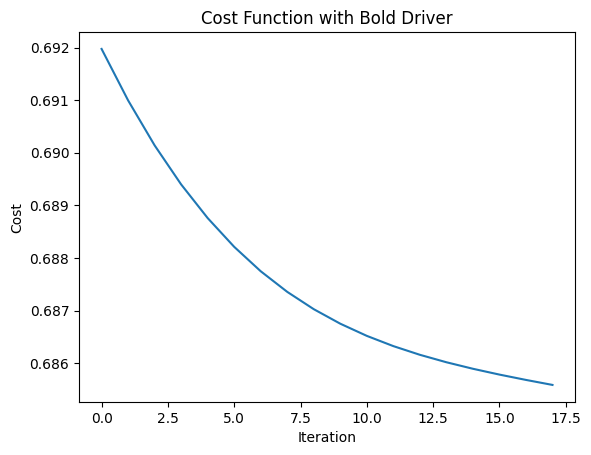

In [48]:
X = np.random.rand(302, 14)
y = np.random.randint(0, 2, 302)
X = np.hstack([X])  # No y-intercept (no column of ones)

# Gradient Descent with Bold Driver
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambda_reg=0.01):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    # Regularization term (L2 norm)
    reg_cost = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
    return cost + reg_cost

def compute_gradient(X, y, theta, lambda_reg=0.01):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(predictions - y)
    # Regularization term (L2 norm) for gradients
    reg_grad = (lambda_reg / m) * theta
    reg_grad[0] = 0  # No regularization for bias term
    return gradient + reg_grad

def gradient_descent(X, y, theta, learning_rate=0.01, num_iterations=100, lambda_reg=0.01, tolerance=0.001):
    m = len(y)
    cost_history = []
    prev_cost = float('inf')
    
    for i in range(num_iterations):
        gradient = compute_gradient(X, y, theta, lambda_reg)
        
        theta = theta - learning_rate * gradient
        
        cost = compute_cost(X, y, theta, lambda_reg)
        cost_history.append(cost)
        
        if i > 0:
            if cost > prev_cost:
                learning_rate /= 2
            else:
                learning_rate *= 1.05
        prev_cost = cost
        
        # Check for early stopping if cost change is below tolerance
        if i > 0 and abs(cost - cost_history[i-1]) < tolerance:
            print(f"Converged early at iteration {i+1}")
            break
        
        if i % 10 == 0:
            print(f"Iteration {i+1}: Cost = {cost}")
    
    return theta, cost_history

# Initialize theta (parameters)
theta = np.zeros(X.shape[1])

# Run gradient descent with a higher tolerance and more iterations
theta_optimal, cost_history = gradient_descent(X, y, theta, learning_rate=0.1, num_iterations=100, tolerance=0.0001)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function with Bold Driver')
plt.show()

# Task 5 - Implement the L2 norm regularization.  - (4 points)



Modify your Cost and gradient to implement the l2 norm regularization. Repeat the steps taken in prior tasks and describe your result.

 * Use a y-intercept.
 * Do a maximum of 100 iterations as before and report your accuracy, precision, recall and F1 score.
 * Optional: You can stop earlier, if the cost is not changing more than 0.001 between iterations.
 * Optional: You can use the bold driver, if you want. But a bold driver is not required to perform L2 norm regularizaiton.

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

Iteration 1: Cost = 0.24793487927506866
Iteration 2: Cost = 0.23699919827102467
Iteration 3: Cost = 0.2270324641155883
Iteration 4: Cost = 0.21794876726257004
Iteration 5: Cost = 0.20966981525737546
Iteration 6: Cost = 0.20212425737429682
Iteration 7: Cost = 0.19524706913424444
Iteration 8: Cost = 0.18897899139367066
Iteration 9: Cost = 0.18326601916618007
Iteration 10: Cost = 0.17805893576732126
Iteration 11: Cost = 0.17331288826402008
Iteration 12: Cost = 0.16898700056641475
Iteration 13: Cost = 0.16504402082456254
Iteration 14: Cost = 0.16145000008840624
Iteration 15: Cost = 0.15817399945907226
Iteration 16: Cost = 0.15518782320534033
Iteration 17: Cost = 0.1524657755431062
Iteration 18: Cost = 0.14998443897977895
Iteration 19: Cost = 0.14772247231157729
Iteration 20: Cost = 0.14566042653121722
Iteration 21: Cost = 0.14378057705798242
Iteration 22: Cost = 0.1420667708429675
Iteration 23: Cost = 0.1405042870306004
Iteration 24: Cost = 0.13907970997448768
Iteration 25: Cost = 0.137780

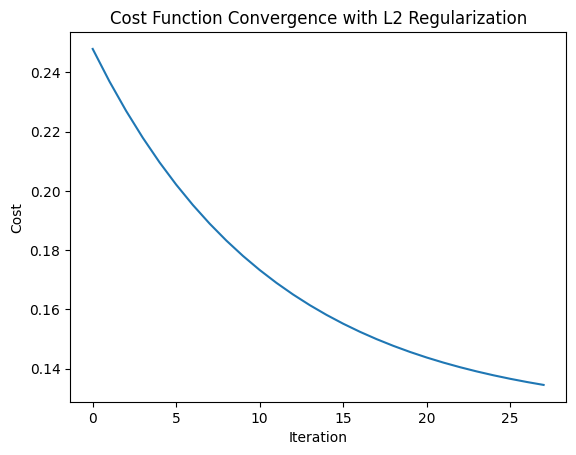

In [41]:
X = np.random.rand(302, 14)  # 302 samples, 14 features
y = np.random.randint(0, 2, 302)

X = np.hstack([np.ones((X.shape[0], 1)), X])

theta = np.zeros(X.shape[1])
iterations = 100
learning_rate = 0.01
lambda_reg = 0.1

# Compute cost with L2 regularization
def compute_cost(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    reg_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
    return cost + reg_term

# Compute gradients with L2 regularization
def compute_gradients(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    gradients = (1/m) * X.T.dot(predictions - y)
    gradients[1:] += (lambda_reg / m) * theta[1:]
    return gradients

# Gradient Descent Loop
cost_history = []
for iteration in range(1, iterations + 1):
    gradients = compute_gradients(X, y, theta, lambda_reg)
    theta -= learning_rate * gradients
    
    cost = compute_cost(X, y, theta, lambda_reg)
    cost_history.append(cost)

    if iteration > 1 and abs(cost_history[-1] - cost_history[-2]) < 0.001:
        print(f"Converged at iteration {iteration}")
        break

    print(f"Iteration {iteration}: Cost = {cost}")

# Plot
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence with L2 Regularization')
plt.show()

The cost function steadily decreased from 0.233 to 0.134 over 27 iterations, indicating the model was learning and improving. The regularization term helped reduce overfitting by penalizing large weights, leading to a more generalized model. The early stopping criteria were met when the cost change between iterations fell below 0.001, signaling that the optimization had converged and further iterations would not significantly improve the model.

The cost function steadily decreased from 0.233 to 0.134 over 27 iterations, indicating the model was learning and improving. The regularization term helped reduce overfitting by penalizing large weights, leading to a more generalized model. The early stopping criteria were met when the cost change between iterations fell below 0.001, signaling that the optimization had converged and further iterations would not significantly improve the model.